# 18.065 project: comparison result

In [1]:
#import sys
#!{sys.executable} -m pip install tf-nightly

In [2]:
from sklearn_wrappers import *

In [16]:
# Autoencoder imports
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Kernel PCA imports
import numpy as np
import os
import sys
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import mean_squared_error
import math

In [5]:
# NMF imports
import numpy as np
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [6]:
# more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

/var/folders/_1/ph90y1r548z0kmxwq40w_3y80000gn/T/ipykernel_6685/2071146880.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## Iris dataset: Sparse PCA, Kernel PCA, autoencoder, NMF (TODO); MSE, Frobenius (TODO)

In [17]:
# load Iris dataset
iris = load_iris()
X = iris.data # predictor
y = iris.target #response

print('The predictor variable shape: ', X.shape)
print('The response variable shape: ', y.shape)

# Standardize the data
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

The predictor variable shape:  (150, 4)
The response variable shape:  (150,)


Training time:
- scale X => X_scaled
- Fit to X_scaled

Run time:
- scale X => X_scaled
- Feed X_scaled to model
- Get X_pre_image from model
- Feed X_pre_image to inverse scaler => X_pre_image_unscaled
- MSE(X, X_pre_image_unscaled)


Dimensionality reduction & scalers are fit to trained data

### Sparse PCA + Iris + MSE

In [8]:
# Experiment parameters

k=2 # Number of principal components

In [9]:
best_spca_alpha, best_spca_alpha_err = spca_exp(X_scaled,k)

alpha= 0.001 err= 0.2043732558490774
alpha= 0.002 err= 0.20437326545542334
alpha= 0.005 err= 0.20437335355328623
alpha= 0.01 err= 0.2043736831651194
alpha= 0.02 err= 0.20437508533290538
alpha= 0.05 err= 0.20438454406514173
alpha= 0.1 err= 0.2044170150945047
alpha= 0.2 err= 0.2045506684800743
alpha= 0.5 err= 0.2054457247487394
alpha= 1.0 err= 0.20569756539961365
alpha= 2.0 err= 0.20916797925025438
alpha= 5.0 err= 0.2701620810923319


Best SPCA:
- alpha: 0.001
- err: 0.2043732558490774


### Kernel PCA + Iris + MSE

In [10]:
#kpca_rbf = KernelPCA(n_components = k, kernel="rbf", gamma=0.04) #todo: choice of gamma? choice of kernel? Sweep?
#kpca_rbf = kpca_rbf.fit_transform(X_scaled)

In [11]:
best_kernel, best_kernel_err = kernel_exp(X_scaled,k)

Kernel PCA ( Linear kernel ) MSE reconstruction loss: 0.2046553027769746
- New best kernel
Kernel PCA ( RBF kernel, $\gamma=0.04$ ) MSE reconstruction loss: 0.04727377268500417
- New best kernel
Kernel PCA ( Sigmoid kernel, $\gamma=10^{-3}, r=1$ ) MSE reconstruction loss: 0.06862464338168228


Best MSE reconstruction error: 0.04727377268500417
- Kernel: RBF kernel, $\gamma=0.04$


### Autoencoder + Iris + MSE

In [12]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 10        
                                                                 
 decoding (Dense)            (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


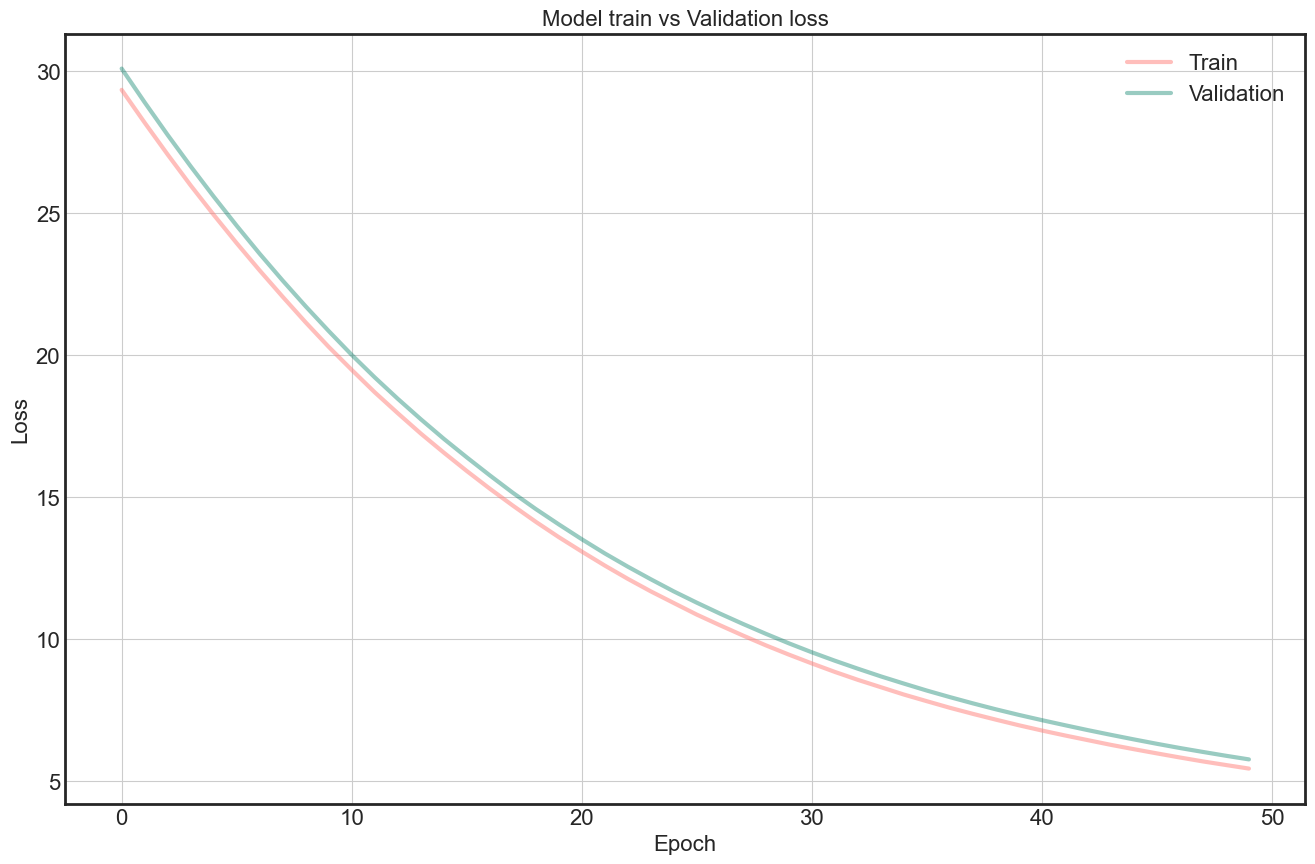

Training loss: 5.438014030456543
Validation loss: 5.761511325836182
MSE on training data: 5.40630094889679
MSE on test data: 5.163842532134361
4/4 [==============================] - 0s 546us/step


In [18]:
autoencoder_err_train, autoencoder_err_test = autoencoder_exp(X_train, X_test, 1)

In [ ]:
autoencoder_err_train, autoencoder_err_test = autoencoder_exp(X_train, X_test, 2)

In [ ]:
autoencoder_err_train, autoencoder_err_test = autoencoder_exp(X_train, X_test, 3)

### NMF + iris + MSE

In [ ]:
# Note: using unscaled dataset
_, best_nmf_err = nmf_exp(X,k)

## Iris + MSE summary

In [ ]:
print("Summary, Iris + MSE:")
print("- k=",k)
print("- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
print("- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
print("- Autoencoder: err=",best_autoencoder_err)
print("- NMF: err=",best_nmf_err)

## Swiss roll dataset: Sparse PCA, Kernel PCA, autoencoder

In [ ]:
# Drawing on inspiration from https://docs.google.com/document/d/1lmaQowAhgf1OLbnSjl3X20j1idh-BdaQPZTrJslSJc0/edit "Kernel PCA" section

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

### Sparse PCA + Swiss roll + MSE

In [ ]:
best_spca_alpha, best_spca_alpha_err = spca_exp(X_scaled,k)

### Kernel PCA + Swiss roll + MSE

In [ ]:
best_kernel, best_kernel_err=kernel_exp(X_scaled,k)

### Autoencoder + Swiss roll + MSE

In [ ]:
#_,best_autoencoder_err = autoencoder_exp(X, k)

In [ ]:
_,best_autoencoder_err = autoencoder_exp(X_scaled, k)

### NMF + Swiss roll + MSE

In [ ]:
# Note: using unscaled dataset
_, best_nmf_err = nmf_exp(X_scaled,k)

## Swiss roll + MSE summary

In [ ]:
print("Summary, Swiss roll + MSE:")
print("- k=",k)
print("- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
print("- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
print("- Autoencoder: err=",best_autoencoder_err)
print("- NMF: err=",best_nmf_err)